In [1]:
#sample QC with linear regression
#model each metric using population and run id and define outliers based on the residuals
require(tidyverse)
require(tidymodels)
require(ggResidpanel)
require(ggplot2)

inputfile = '/lustre/scratch123/qc/matrixtables/mt_pops_QC_filters.ht2.tsv.bgz'#made by exporting hail table to pandas using flattern=true, then expoerting from pandas
qc_df = read.table(inputfile, sep = "\t", header = T)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: tidymodels

── Attaching packages ────────────────────────────────────── tidymodels 0.2.0 ──

✔ broom        0.8.0     ✔ rsample      0.1.1
✔ dials        0.1.1     ✔ tune         0.2.0
✔ infer        1.0.0     ✔ workflows    0.2.6
✔ modeldata    0.1.1     ✔ workflowsets 0.2.1
✔ parsnip      0.2.1     ✔ yardstick    0.0.9
✔ recipes      0.2.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr:

In [2]:
#samples where the batch is not defined are from Broad
qc_df$batch <- as.character(qc_df$batch)
qc_df$batch[is.na(qc_df$batch)] <- "Broad"

In [3]:
#drop any rows contains NAs prior to regression
all_samples = qc_df$s
qc_df = qc_df %>% drop_na()
no_na_samples = qc_df$s

samples_dropped_due_to_NA = setdiff(all_samples, no_na_samples)

In [4]:
#make one linear model for each metric and extract residuals
lm_snp = lm(sample_qc.n_snp ~ assigned_pop + batch, data = qc_df)
lm_snp_residuals = lm_snp$resid

lm_ti = lm(sample_qc.n_transition ~ assigned_pop + batch, data = qc_df)
lm_ti_residuals = lm_ti$resid

lm_tv = lm(sample_qc.n_transversion ~ assigned_pop + batch, data = qc_df)
lm_tv_residuals = lm_tv$resid

lm_rtitv = lm(sample_qc.r_ti_tv ~ assigned_pop + batch, data = qc_df)
lm_rtitv_residuals = lm_rtitv$resid

lm_hetr = lm(sample_qc.heterozygosity_rate ~ assigned_pop + batch, data = qc_df)
lm_hetr_residuals = lm_hetr$resid

lm_rhethom = lm(sample_qc.r_het_hom_var ~ assigned_pop + batch, data = qc_df)
lm_rhethom_residuals = lm_rhethom$resid

lm_n_ins = lm(sample_qc.n_insertion ~ assigned_pop + batch, data = qc_df)
lm_n_ins_residuals = lm_n_ins$resid

lm_n_del = lm(sample_qc.n_deletion ~ assigned_pop + batch, data = qc_df)
lm_n_del_residuals = lm_n_del$resid

lm_rinsdel = lm(sample_qc.r_insertion_deletion ~ assigned_pop + batch, data = qc_df)
lm_rinsdel_residuals = lm_rinsdel$resid

`geom_smooth()` using formula 'y ~ x'



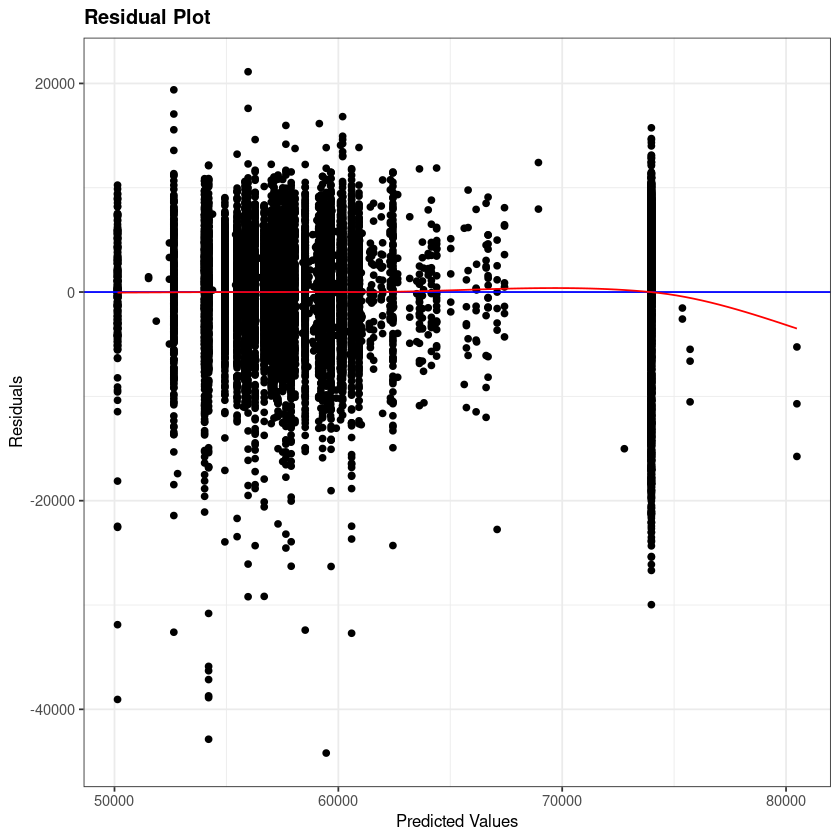

In [5]:
lm_snp %>% resid_panel(plots = c("resid"), smoother = TRUE)

`geom_smooth()` using formula 'y ~ x'



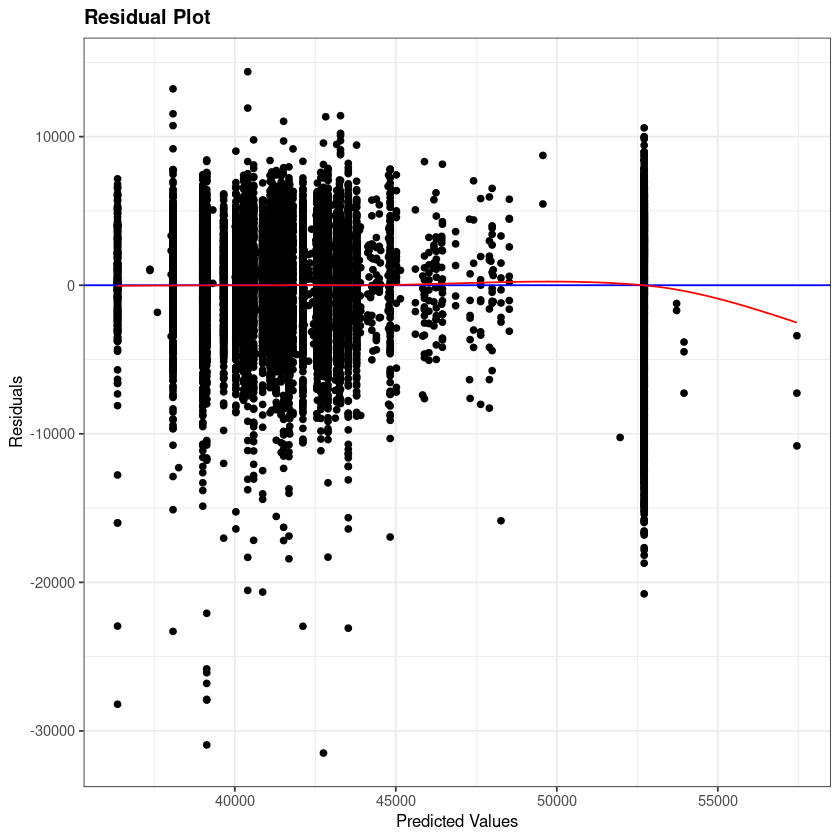

In [6]:
lm_ti %>% resid_panel(plots = c("resid"), smoother = TRUE)

`geom_smooth()` using formula 'y ~ x'



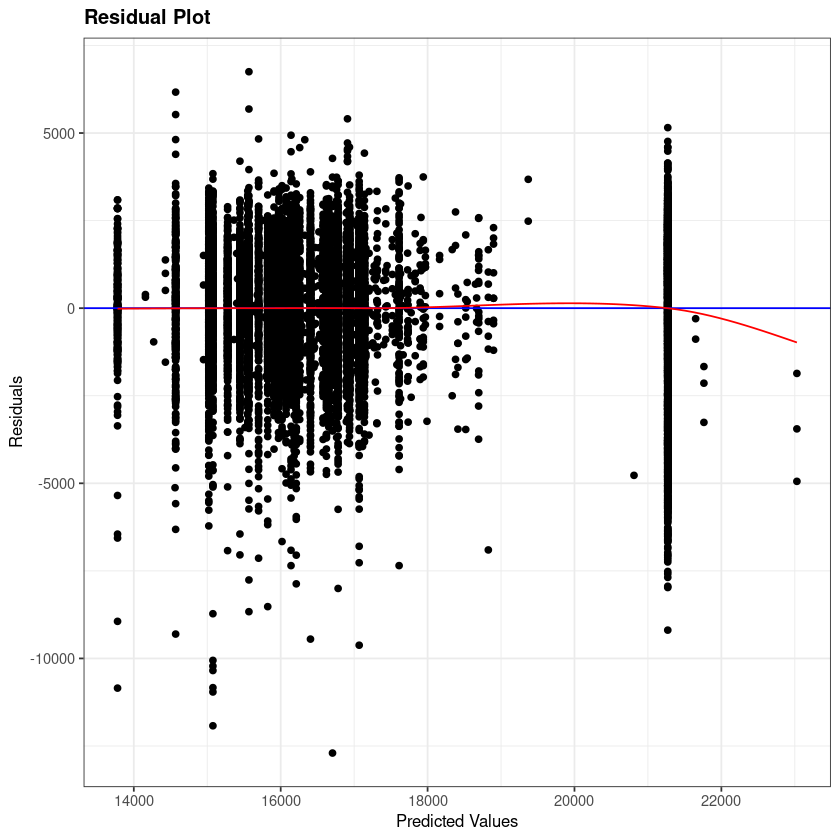

In [7]:
lm_tv %>% resid_panel(plots = c("resid"), smoother = TRUE)

`geom_smooth()` using formula 'y ~ x'



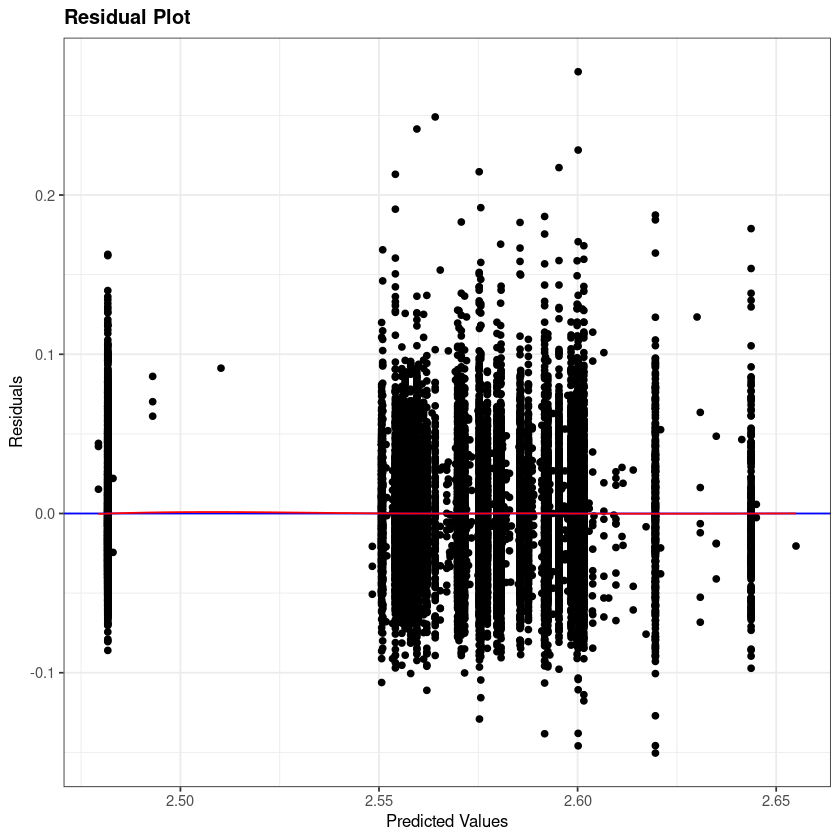

In [8]:
lm_rtitv %>% resid_panel(plots = c("resid"), smoother = TRUE)

`geom_smooth()` using formula 'y ~ x'



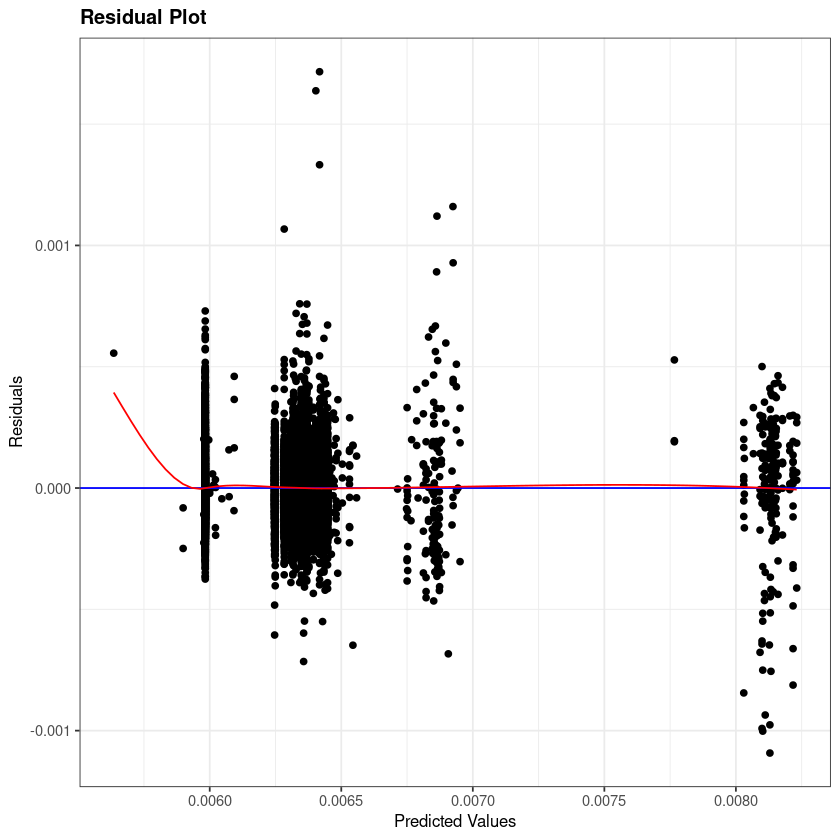

In [9]:
lm_hetr %>% resid_panel(plots = c("resid"), smoother = TRUE)

`geom_smooth()` using formula 'y ~ x'



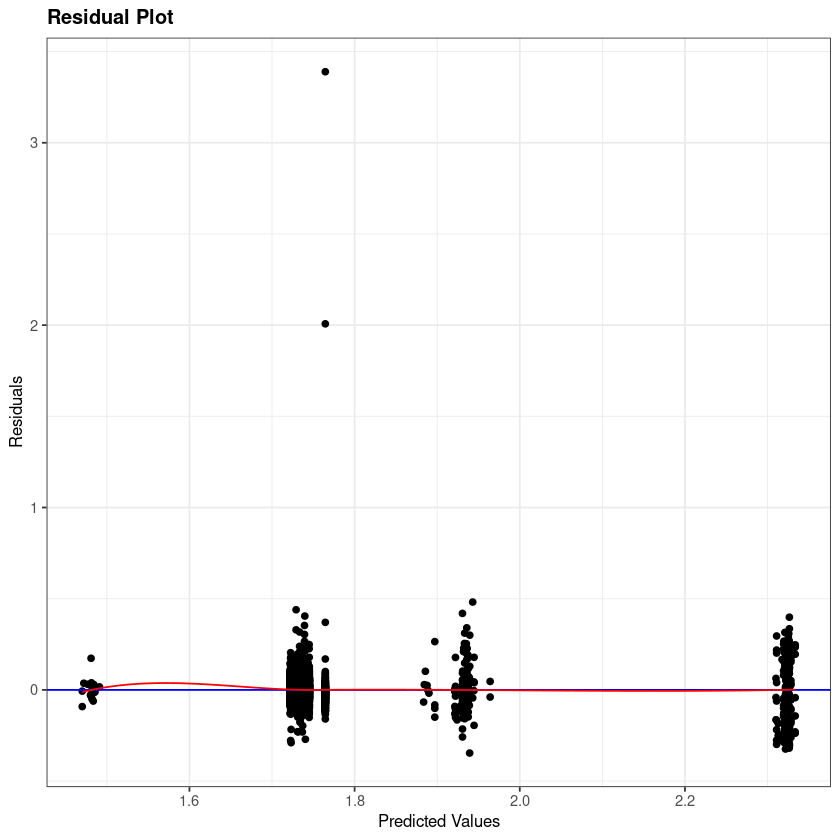

In [10]:
lm_rhethom %>% resid_panel(plots = c("resid"), smoother = TRUE)

`geom_smooth()` using formula 'y ~ x'



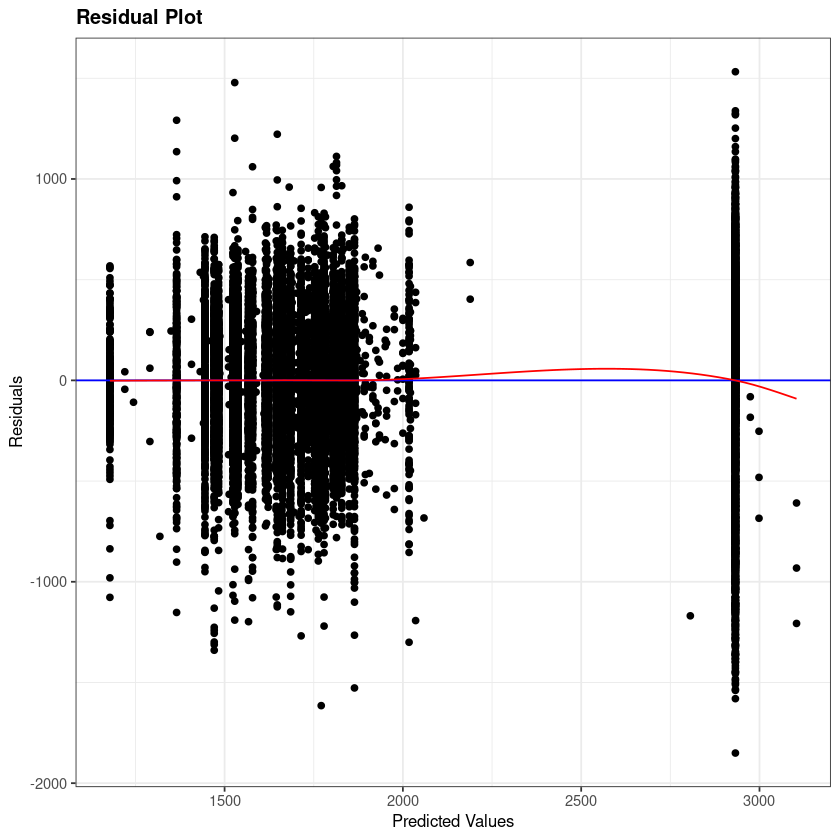

In [11]:
lm_n_ins %>% resid_panel(plots = c("resid"), smoother = TRUE)

`geom_smooth()` using formula 'y ~ x'



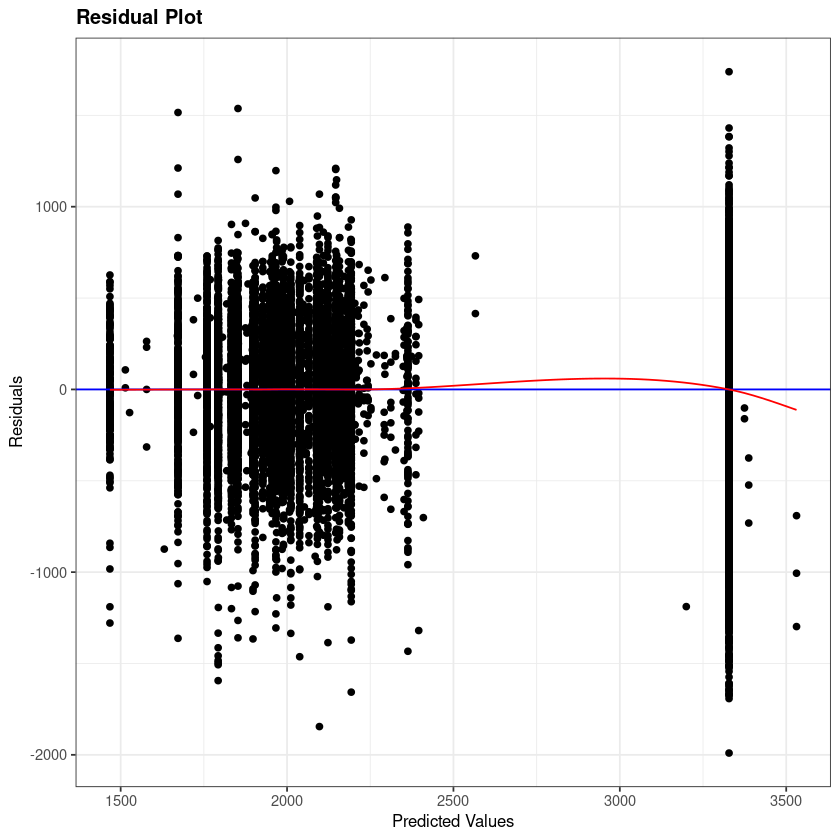

In [12]:
lm_n_del %>% resid_panel(plots = c("resid"), smoother = TRUE)

`geom_smooth()` using formula 'y ~ x'



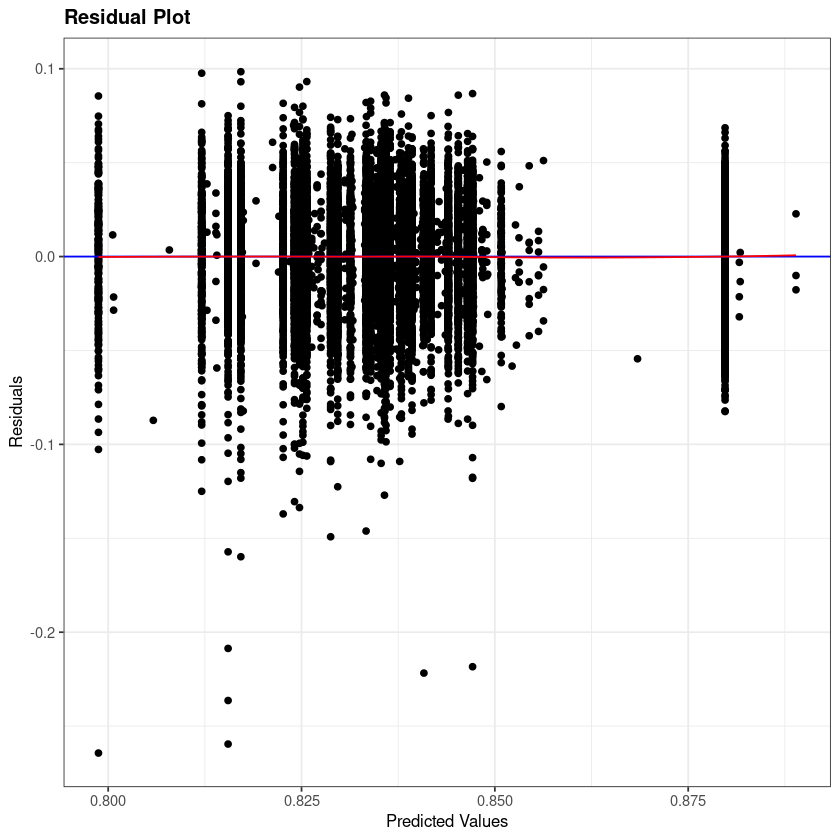

In [13]:
lm_rinsdel %>% resid_panel(plots = c("resid"), smoother = TRUE)

In [21]:
#calculate z scores
z_snp = (lm_snp_residuals - mean(lm_snp_residuals))/sd(lm_snp_residuals)
z_ti = (lm_ti_residuals - mean(lm_ti_residuals))/sd(lm_ti_residuals)
z_tv = (lm_tv_residuals - mean(lm_tv_residuals))/sd(lm_tv_residuals)
z_rtitv = (lm_rtitv_residuals - mean(lm_rtitv_residuals))/sd(lm_rtitv_residuals)
z_hetr = (lm_hetr_residuals - mean(lm_hetr_residuals))/sd(lm_hetr_residuals)
z_rhethom = (lm_rhethom_residuals - mean(lm_rhethom_residuals))/sd(lm_rhethom_residuals)
z_ins = (lm_n_ins_residuals - mean(lm_n_ins_residuals))/sd(lm_n_ins_residuals)
z_del = (lm_n_del_residuals - mean(lm_n_del_residuals))/sd(lm_n_del_residuals)
z_rinsdel = (lm_rinsdel_residuals - mean(lm_rinsdel_residuals))/sd(lm_rinsdel_residuals)

z_df = as.data.frame(cbind(z_snp, z_ti, z_tv, z_rtitv, z_hetr, z_rhethom, z_ins, z_del, z_rinsdel))

summary(z_df)

     z_snp               z_ti               z_tv             z_rtitv        
 Min.   :-8.19388   Min.   :-8.45148   Min.   :-7.59924   Min.   :-3.87669  
 1st Qu.:-0.52070   1st Qu.:-0.51873   1st Qu.:-0.53134   1st Qu.:-0.68542  
 Median : 0.08934   Median : 0.09138   Median : 0.07943   Median :-0.09955  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.65701   3rd Qu.: 0.65522   3rd Qu.: 0.66259   3rd Qu.: 0.57593  
 Max.   : 3.91606   Max.   : 3.85685   Max.   : 4.03828   Max.   : 7.14929  
     z_hetr           z_rhethom            z_ins              z_del         
 Min.   :-8.02518   Min.   :-5.87525   Min.   :-5.33278   Min.   :-5.28746  
 1st Qu.:-0.61340   1st Qu.:-0.49851   1st Qu.:-0.55695   1st Qu.:-0.55306  
 Median :-0.05805   Median :-0.03232   Median : 0.03982   Median : 0.04732  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.55822   3rd Qu.: 0.45628   3rd Qu.: 0.63320   3rd Qu.: 0.63973  

In [22]:
head(z_df)

,z_snp,z_ti,z_tv,z_rtitv,z_hetr,z_rhethom,z_ins,z_del,z_rinsdel
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.78746083,0.76509252,0.83536328,-1.06791426,-0.3709517,-1.0584425,0.79058512,0.86486228,0.0345986
2,-0.37366094,-0.37720742,-0.36482527,0.17522011,0.4215657,-0.2962678,-0.31605432,-0.47679170,0.8272367
3,0.85611786,0.91927728,0.71319500,0.46745846,0.9720207,-3.1621831,0.63945905,0.65018485,0.1866721
4,-0.20789236,-0.21455851,-0.19251505,-0.02950998,-0.6030360,0.3579714,-0.04227633,-0.13407217,0.5359689
5,-0.03136922,-0.01057638,-0.07764157,0.38367640,-0.1003440,-0.2873117,-0.01057573,-0.09687780,0.5182411
6,0.16629220,0.16361363,0.17184927,-0.24905660,-0.7339616,-0.3215257,0.19403730,0.03595923,0.9858753


In [25]:
#calculate mean Z score and mean absolute z score
mean_z = rowMeans(z_df)
mean_abs_z = rowMeans(abs(z_df))


                    

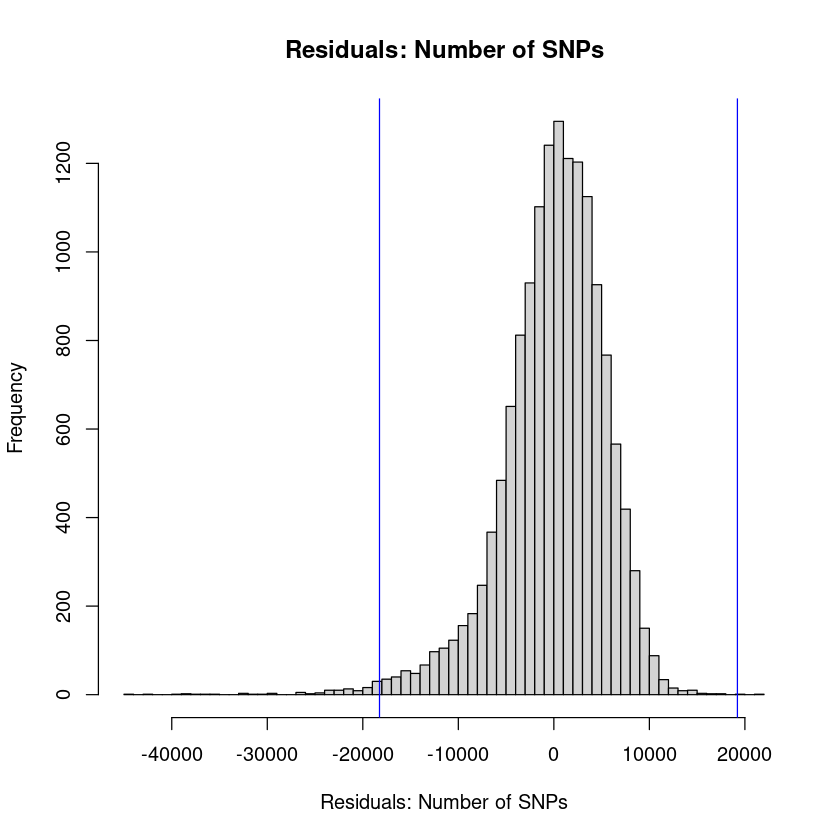

In [33]:
#plot residuals and z scores for each metric
#nSNPs
hist(lm_snp_residuals, breaks = 50, main = "Residuals: Number of SNPs", xlab = "Residuals: Number of SNPs")
upperlim = median(lm_snp_residuals) + (4*mad(lm_snp_residuals))
lowerlim = median(lm_snp_residuals) - (4*mad(lm_snp_residuals))
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [35]:
snp_outlier_resids = c(qc_df$s[which(lm_snp_residuals < lowerlim)], qc_df$s[which(lm_snp_residuals > upperlim)])
snp_outlier_resids

[1] "EGAN00003143562"          "EGAN00003145610"         
  [3] "EGAN00003145818"          "EGAN00003145847"         
  [5] "EGAN00003146269"          "EGAN00003147483"         
  [7] "EGAN00003147622"          "EGAN00003148163"         
  [9] "EGAN00003148211"          "EGAN00003148225"         
 [11] "EGAN00003148234"          "EGAN00003148240"         
 [13] "EGAN00003148281"          "EGAN00003151639"         
 [15] "EGAN00003151658"          "EGAN00003151663"         
 [17] "EGAN00003151933"          "EGAN00003152621"         
 [19] "EGAN00003153062"          "EGAN00003154631"         
 [21] "EGAN00003154755"          "EGAN00003154765"         
 [23] "EGAN00003235719"          "EGAN00003235771"         
 [25] "EGAN00003235920"          "EGAN00003236451"         
 [27] "EGAN00003236500"          "EGAN00003236549"         
 [29] "EGAN00003237225"          "EGAN00003237400"         
 [31] "EGAN00003237515"          "EGAN00003237535"         
 [33] "EGAN00003237837"          "EGAN00003306559"         
 [35] "EGAN00003306725"          "EGAN00003307090"         
 [37] "EGAN00003307122"          "EGAN00003307159"         
 [39] "EGAN00003307454"          "EGAN00003307623"         
 [41] "EGAN00003307643"          "EGAN00003308318"         
 [43] "EGAN00003309011"          "EGAN00003309089"         
 [45] "EGAN00003309091"          "EGAN00003309093"         
 [47] "EGAN00003309174"          "EGAN00003309176"         
 [49] "EGAN00003309181"          "EGAN00003309186"         
 [51] "EGAN00003332049_remapped" "Z00310_2"                
 [53] "Z00327_2"                 "Z00375"                  
 [55] "Z00972"                   "Z01326"                  
 [57] "Z02023"                   "Z02096"                  
 [59] "Z02930"                   "Z03258"                  
 [61] "Z03285"                   "Z03605_2"                
 [63] "Z03913_2"                 "Z04736"                  
 [65] "Z04998"                   "Z05101"                  
 [67] "Z05104_2"                 "Z05313"                  
 [69] "Z05970"                   "Z06966"                  
 [71] "Z07803"                   "Z07875"                  
 [73] "Z08430"                   "Z09197"                  
 [75] "Z09565"                   "Z09731"                  
 [77] "Z10251"                   "Z10275_2"                
 [79] "Z11300"                   "Z11586"                  
 [81] "Z11654_2"                 "Z11774"                  
 [83] "Z12428_2"                 "Z12585_2"                
 [85] "Z13301"                   "Z13364"                  
 [87] "Z13465"                   "Z13834"                  
 [89] "Z14814_2"                 "Z14920_2"                
 [91] "Z15011"                   "Z16323_2"                
 [93] "Z16476"                   "Z16669"                  
 [95] "Z17252"                   "Z18332"                  
 [97] "Z18412"                   "Z18727"                  
 [99] "Z18796"                   "Z19120_2"                
[101] "Z19543"                   "Z19635"                  
[103] "Z19651"                   "Z19737_2"                
[105] "Z20430"                   "Z20472_2"                
[107] "Z20940"                   "EGAN00003233493"         
[109] "EGAN00003237831"

In [41]:
length(which(startsWith(snp_outlier_resids, "E")))
length(which(startsWith(snp_outlier_resids, "Z")))
length(snp_outlier_resids)

[1] 53

[1] 56

[1] 109

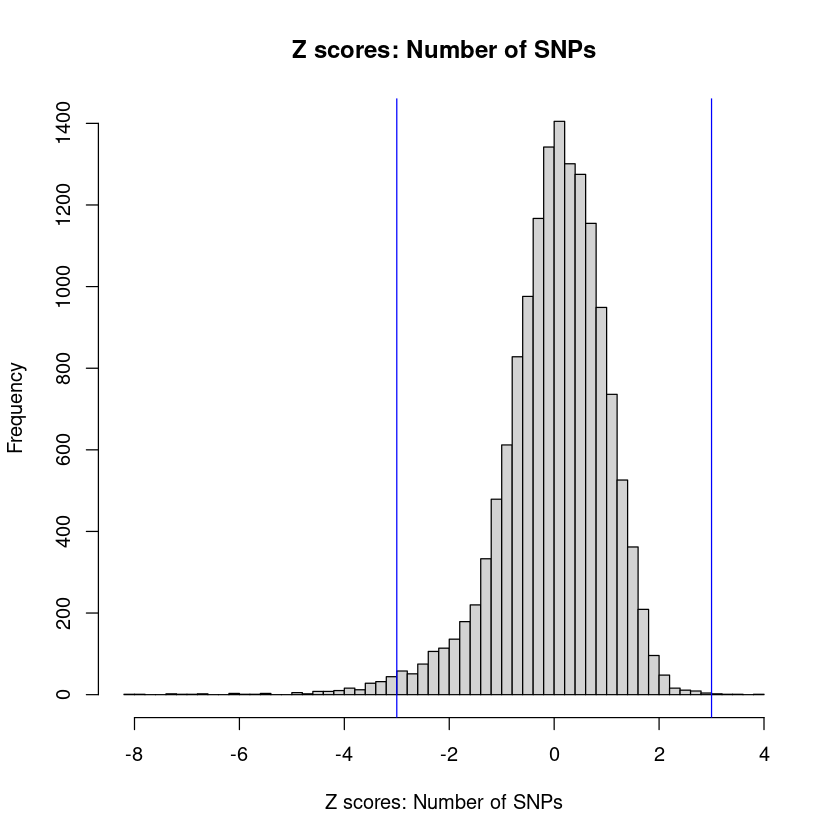

In [42]:
hist(z_df$z_snp, breaks = 50, main = "Z scores: Number of SNPs", xlab = "Z scores: Number of SNPs")
upperlim = 3
lowerlim = -3
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [43]:
snp_outlier_z = c(qc_df$s[which(z_df$z_snp < lowerlim)], qc_df$s[which(z_df$z_snp > upperlim)])
snp_outlier_z

[1] "EGAN00003143562"          "EGAN00003144963"         
  [3] "EGAN00003145245"          "EGAN00003145610"         
  [5] "EGAN00003145818"          "EGAN00003145847"         
  [7] "EGAN00003145935"          "EGAN00003146269"         
  [9] "EGAN00003147483"          "EGAN00003147622"         
 [11] "EGAN00003148058"          "EGAN00003148163"         
 [13] "EGAN00003148211"          "EGAN00003148225"         
 [15] "EGAN00003148234"          "EGAN00003148240"         
 [17] "EGAN00003148281"          "EGAN00003148311"         
 [19] "EGAN00003148371"          "EGAN00003148384"         
 [21] "EGAN00003148398"          "EGAN00003148414"         
 [23] "EGAN00003151639"          "EGAN00003151647"         
 [25] "EGAN00003151658"          "EGAN00003151660"         
 [27] "EGAN00003151663"          "EGAN00003151933"         
 [29] "EGAN00003152606"          "EGAN00003152621"         
 [31] "EGAN00003153062"          "EGAN00003153203"         
 [33] "EGAN00003154631"          "EGAN00003154755"         
 [35] "EGAN00003154765"          "EGAN00003235719"         
 [37] "EGAN00003235771"          "EGAN00003235837"         
 [39] "EGAN00003235920"          "EGAN00003236451"         
 [41] "EGAN00003236500"          "EGAN00003236549"         
 [43] "EGAN00003237101"          "EGAN00003237225"         
 [45] "EGAN00003237400"          "EGAN00003237515"         
 [47] "EGAN00003237535"          "EGAN00003237837"         
 [49] "EGAN00003306559"          "EGAN00003306725"         
 [51] "EGAN00003307047"          "EGAN00003307090"         
 [53] "EGAN00003307113"          "EGAN00003307122"         
 [55] "EGAN00003307159"          "EGAN00003307238"         
 [57] "EGAN00003307454"          "EGAN00003307623"         
 [59] "EGAN00003307641"          "EGAN00003307643"         
 [61] "EGAN00003307836"          "EGAN00003308318"         
 [63] "EGAN00003308820"          "EGAN00003308845"         
 [65] "EGAN00003309011"          "EGAN00003309089"         
 [67] "EGAN00003309091"          "EGAN00003309093"         
 [69] "EGAN00003309174"          "EGAN00003309176"         
 [71] "EGAN00003309181"          "EGAN00003309186"         
 [73] "EGAN00003309548"          "EGAN00003332049_remapped"
 [75] "EGAN00003332050_remapped" "Z00310_2"                
 [77] "Z00327_2"                 "Z00375"                  
 [79] "Z00575_2"                 "Z00614_2"                
 [81] "Z00946"                   "Z00972"                  
 [83] "Z01326"                   "Z01365"                  
 [85] "Z01425"                   "Z01467"                  
 [87] "Z02023"                   "Z02096"                  
 [89] "Z02930"                   "Z02946_2"                
 [91] "Z03258"                   "Z03285"                  
 [93] "Z03373"                   "Z03605_2"                
 [95] "Z03913_2"                 "Z04091"                  
 [97] "Z04160_2"                 "Z04554"                  
 [99] "Z04736"                   "Z04942"                  
[101] "Z04998"                   "Z05101"                  
[103] "Z05104_2"                 "Z05313"                  
[105] "Z05442"                   "Z05753_2"                
[107] "Z05970"                   "Z06187_2"                
[109] "Z06966"                   "Z07311_2"                
[111] "Z07352"                   "Z07803"                  
[113] "Z07875"                   "Z07888"                  
[115] "Z08430"                   "Z08587"                  
[117] "Z08592_2"                 "Z08899"                  
[119] "Z09026"                   "Z09030"                  
[121] "Z09197"                   "Z09549_2"                
[123] "Z09560"                   "Z09565"                  
[125] "Z09731"                   "Z09885"                  
[127] "Z10115"                   "Z10128_2"                
[129] "Z10251"                   "Z10275_2"                
[131] "Z10283_2"                 "Z10542_2"                
[133] "Z11300"                   "Z11468" 

In [44]:
length(which(startsWith(snp_outlier_z, "E")))
length(which(startsWith(snp_outlier_z, "Z")))
length(snp_outlier_z)

[1] 80

[1] 106

[1] 186

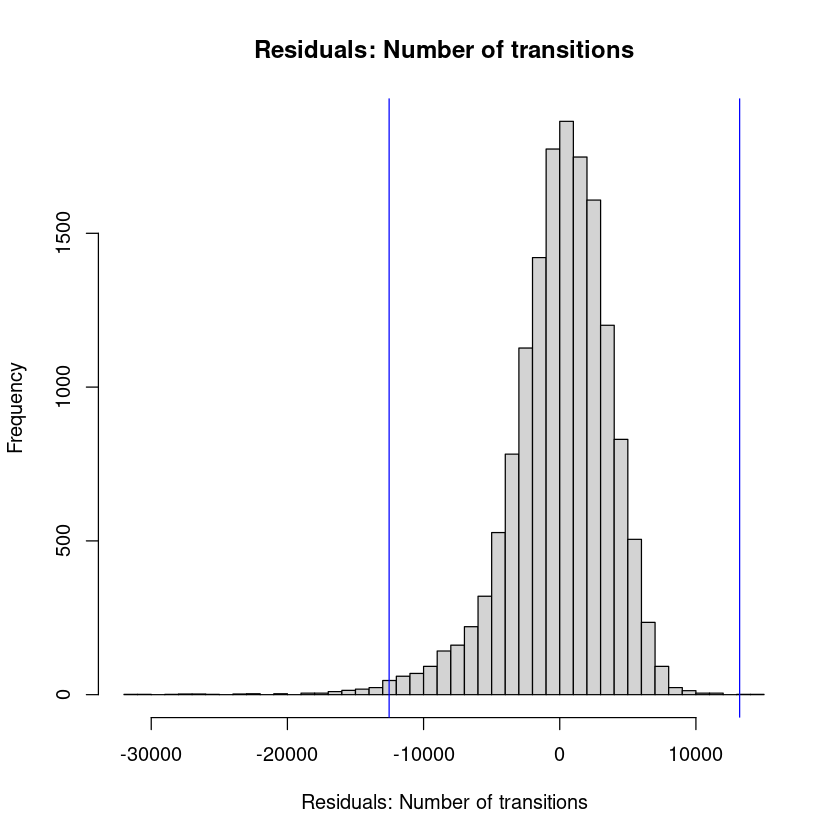

In [45]:
#n transitions
hist(lm_ti_residuals, breaks = 50, main = "Residuals: Number of transitions", xlab = "Residuals: Number of transitions")
upperlim = median(lm_ti_residuals) + (4*mad(lm_ti_residuals))
lowerlim = median(lm_ti_residuals) - (4*mad(lm_ti_residuals))
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [46]:
n_ti_outlier_resids = c(qc_df$s[which(lm_ti_residuals < lowerlim)], qc_df$s[which(lm_ti_residuals > upperlim)])
length(which(startsWith(n_ti_outlier_resids, "E")))
length(which(startsWith(n_ti_outlier_resids, "Z")))
length(n_ti_outlier_resids)

[1] 55

[1] 59

[1] 114

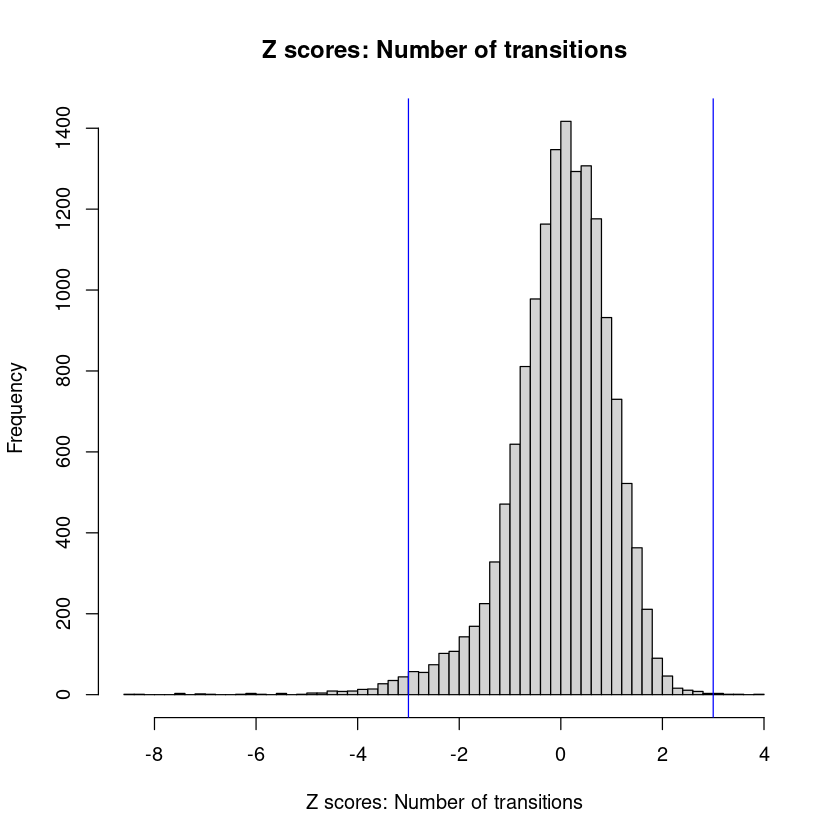

In [47]:
hist(z_df$z_ti, breaks = 50, main = "Z scores: Number of transitions", xlab = "Z scores: Number of transitions")
upperlim = 3
lowerlim = -3
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [48]:
n_ti_outlier_z = c(qc_df$s[which(z_df$z_ti < lowerlim)], qc_df$s[which(z_df$z_ti > upperlim)])
length(which(startsWith(n_ti_outlier_z, "E")))
length(which(startsWith(n_ti_outlier_z, "Z")))
length(n_ti_outlier_z)

[1] 81

[1] 109

[1] 190

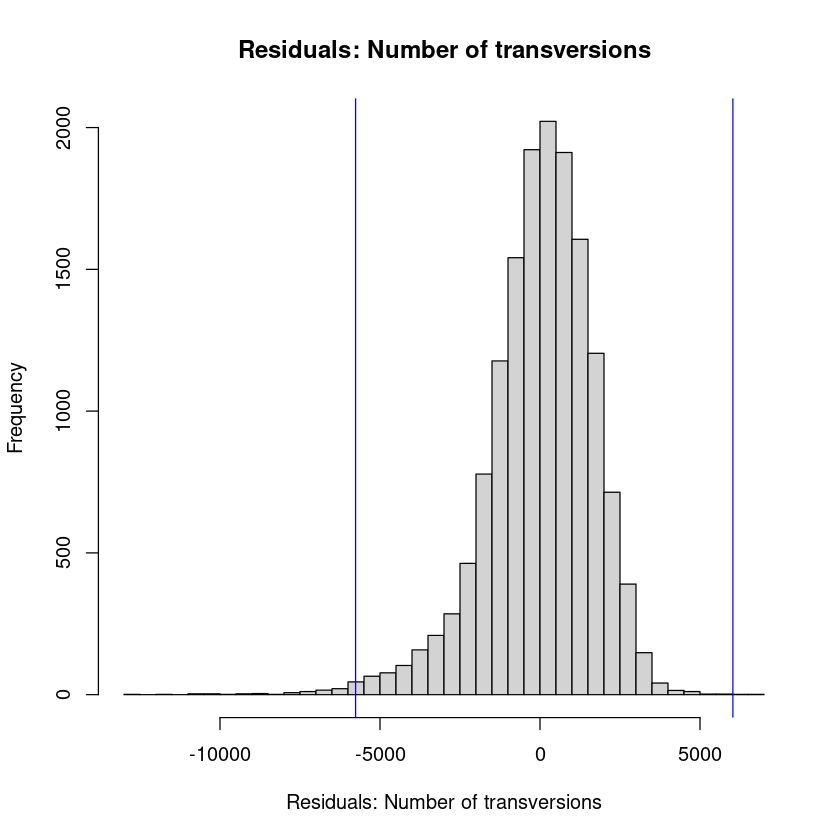

In [49]:
#n transversions
hist(lm_tv_residuals, breaks = 50, main = "Residuals: Number of transversions", xlab = "Residuals: Number of transversions")
upperlim = median(lm_tv_residuals) + (4*mad(lm_tv_residuals))
lowerlim = median(lm_tv_residuals) - (4*mad(lm_tv_residuals))
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [50]:
n_tv_outlier_resids = c(qc_df$s[which(lm_tv_residuals < lowerlim)], qc_df$s[which(lm_tv_residuals > upperlim)])
length(which(startsWith(n_tv_outlier_resids, "E")))
length(which(startsWith(n_tv_outlier_resids, "Z")))
length(n_tv_outlier_resids)

[1] 45

[1] 44

[1] 89

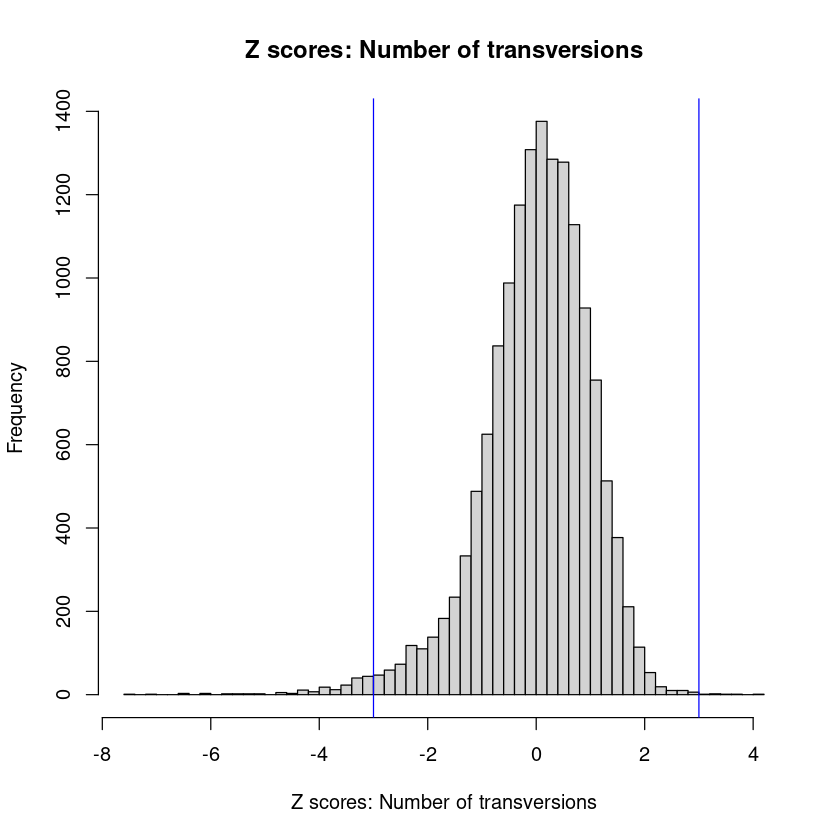

In [51]:
hist(z_df$z_tv, breaks = 50, main = "Z scores: Number of transversions", xlab = "Z scores: Number of transversions")
upperlim = 3
lowerlim = -3
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [52]:
n_tv_outlier_z = c(qc_df$s[which(z_df$z_tv < lowerlim)], qc_df$s[which(z_df$z_tv > upperlim)])
length(which(startsWith(n_tv_outlier_z, "E")))
length(which(startsWith(n_tv_outlier_z, "Z")))
length(n_tv_outlier_z)

[1] 79

[1] 106

[1] 185

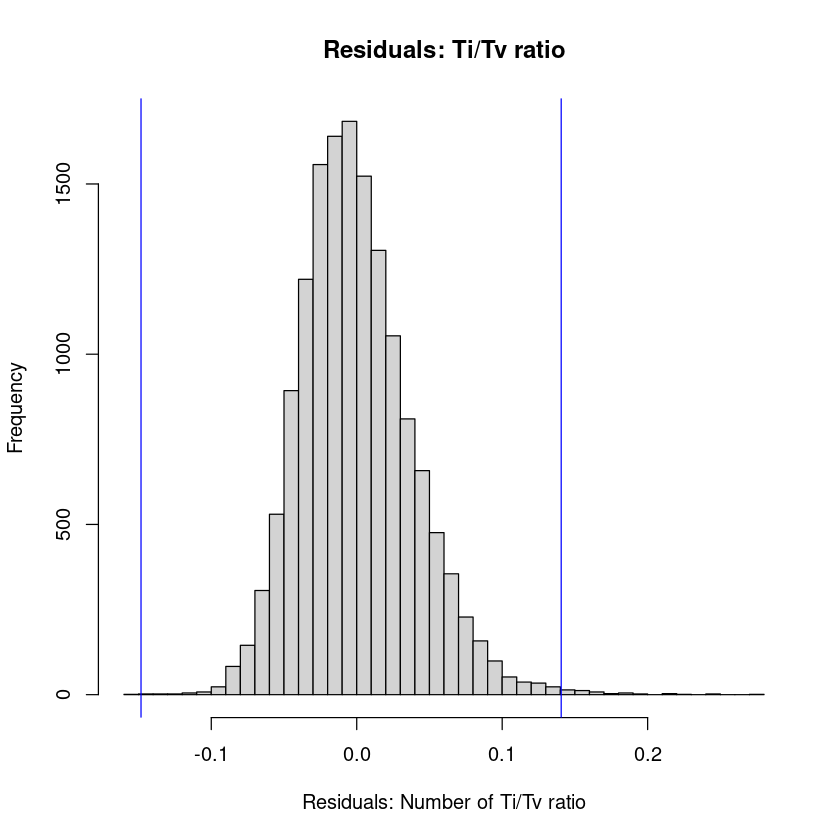

In [53]:
#Ti/tv ratio
hist(lm_rtitv_residuals, breaks = 50, main = "Residuals: Ti/Tv ratio", xlab = "Residuals: Number of Ti/Tv ratio")
upperlim = median(lm_rtitv_residuals) + (4*mad(lm_rtitv_residuals))
lowerlim = median(lm_rtitv_residuals) - (4*mad(lm_rtitv_residuals))
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [54]:
rtitv_outlier_resids = c(qc_df$s[which(lm_rtitv_residuals < lowerlim)], qc_df$s[which(lm_rtitv_residuals > upperlim)])
length(which(startsWith(rtitv_outlier_resids, "E")))
length(which(startsWith(rtitv_outlier_resids, "Z")))
length(rtitv_outlier_resids)

[1] 48

[1] 1

[1] 49

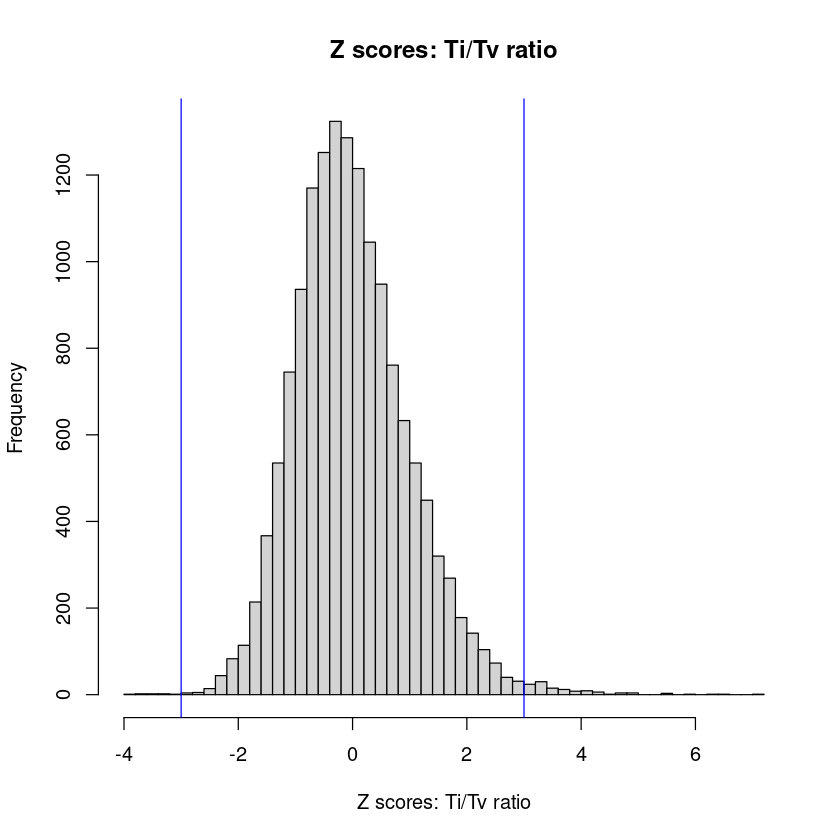

In [55]:
hist(z_df$z_rtitv, breaks = 50, main = "Z scores: Ti/Tv ratio", xlab = "Z scores: Ti/Tv ratio")
upperlim = 3
lowerlim = -3
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [56]:
rtitv_outlier_z = c(qc_df$s[which(z_df$z_rtitv < lowerlim)], qc_df$s[which(z_df$z_rtitv > upperlim)])
length(which(startsWith(rtitv_outlier_z, "E")))
length(which(startsWith(rtitv_outlier_z, "Z")))
length(rtitv_outlier_z)

[1] 116

[1] 12

[1] 128

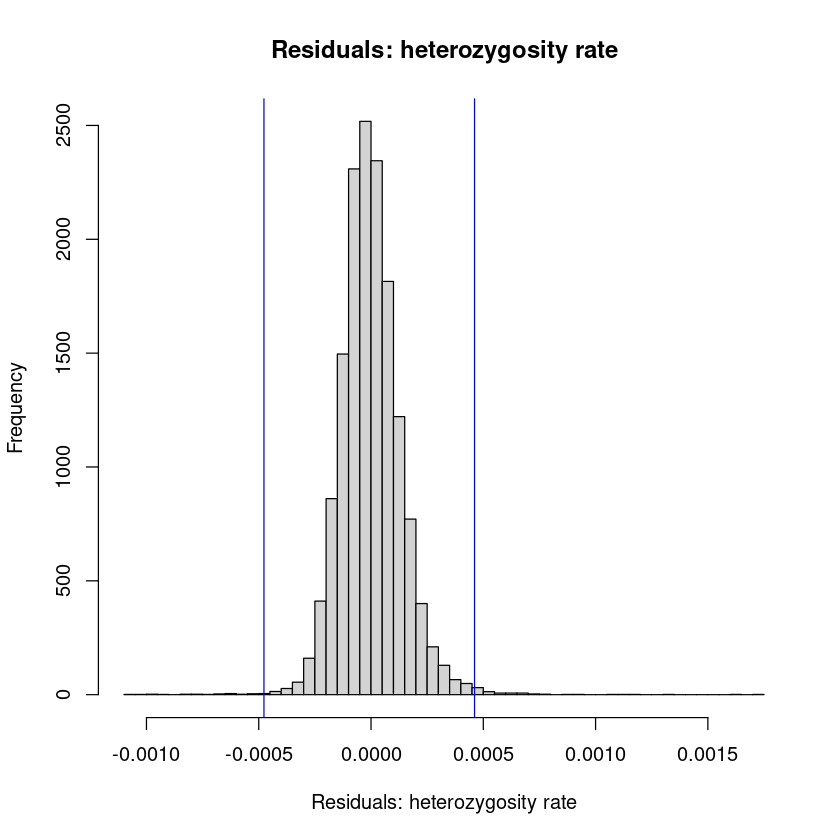

In [57]:
#heterozygosity rate
hist(lm_hetr_residuals, breaks = 50, main = "Residuals: heterozygosity rate", xlab = "Residuals: heterozygosity rate")
upperlim = median(lm_hetr_residuals) + (4*mad(lm_hetr_residuals))
lowerlim = median(lm_hetr_residuals) - (4*mad(lm_hetr_residuals))
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [58]:
het_rate_outlier_resids = c(qc_df$s[which(lm_hetr_residuals < lowerlim)], qc_df$s[which(lm_hetr_residuals > upperlim)])
length(which(startsWith(het_rate_outlier_resids, "E")))
length(which(startsWith(het_rate_outlier_resids, "Z")))
length(het_rate_outlier_resids)

[1] 76

[1] 15

[1] 91

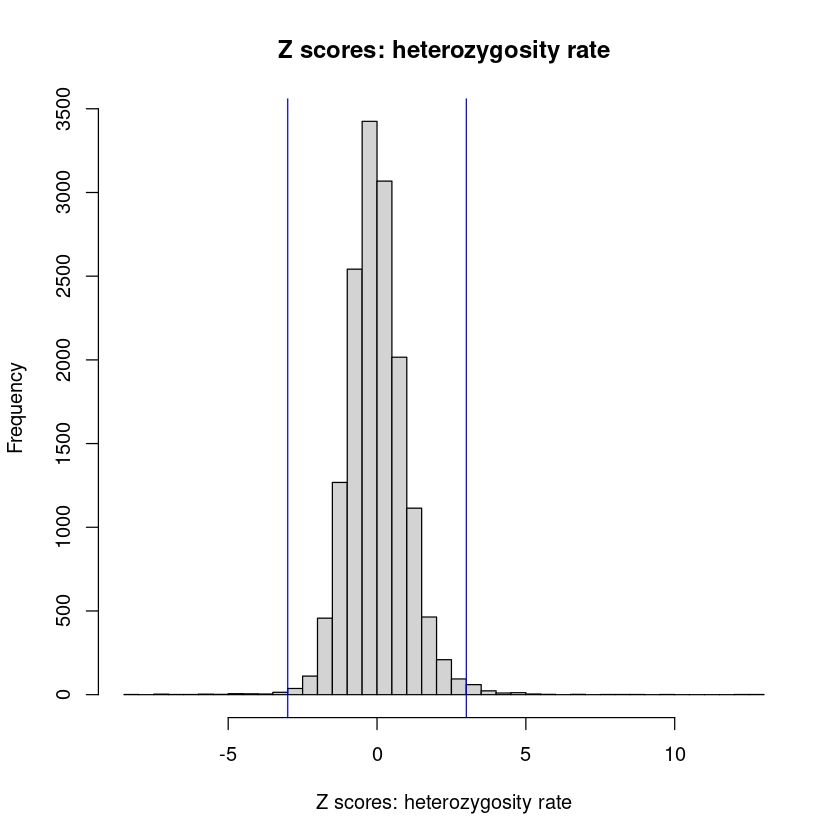

In [59]:
hist(z_df$z_hetr, breaks = 50, main = "Z scores: heterozygosity rate", xlab = "Z scores: heterozygosity rate")
upperlim = 3
lowerlim = -3
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [60]:
hetr_outlier_z = c(qc_df$s[which(z_df$z_hetr < lowerlim)], qc_df$s[which(z_df$z_hetr > upperlim)])
length(which(startsWith(hetr_outlier_z, "E")))
length(which(startsWith(hetr_outlier_z, "Z")))
length(hetr_outlier_z)

[1] 119

[1] 40

[1] 159

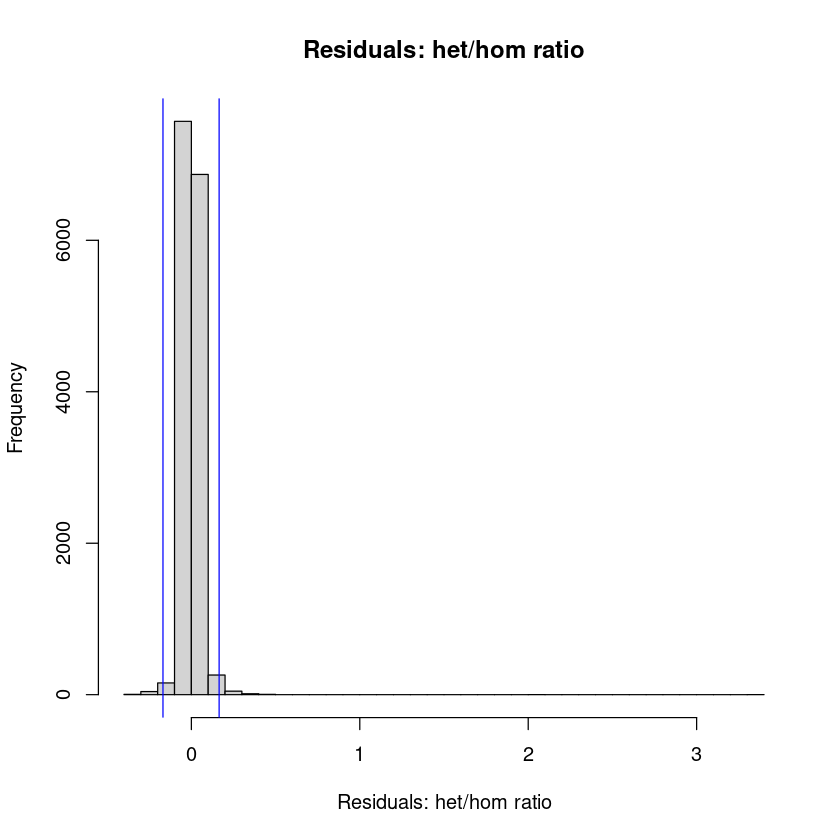

In [61]:
#het/hom ratio
hist(lm_rhethom_residuals, breaks = 50, main = "Residuals: het/hom ratio", xlab = "Residuals: het/hom ratio")
upperlim = median(lm_rhethom_residuals) + (4*mad(lm_rhethom_residuals))
lowerlim = median(lm_rhethom_residuals) - (4*mad(lm_rhethom_residuals))
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [62]:
rhethom_outlier_resids = c(qc_df$s[which(lm_rhethom_residuals < lowerlim)], qc_df$s[which(lm_rhethom_residuals > upperlim)])
length(which(startsWith(rhethom_outlier_resids, "E")))
length(which(startsWith(rhethom_outlier_resids, "Z")))
length(rhethom_outlier_resids)

[1] 160

[1] 6

[1] 166

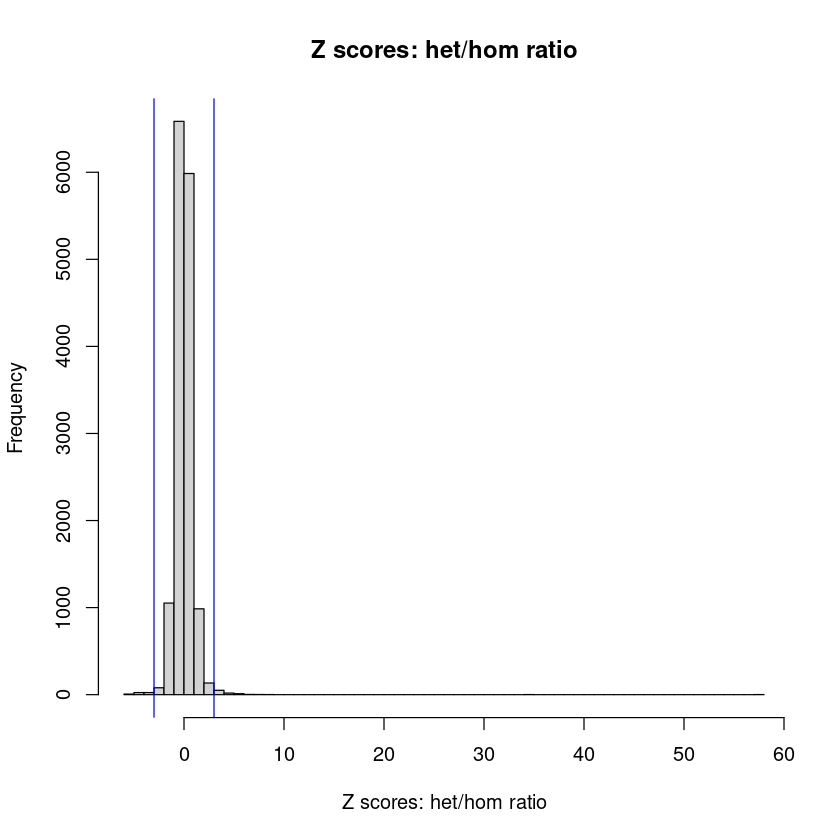

In [63]:
hist(z_df$z_rhethom, breaks = 50, main = "Z scores: het/hom ratio", xlab = "Z scores: het/hom ratio")
upperlim = 3
lowerlim = -3
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [64]:
rhethom_outlier_z = c(qc_df$s[which(z_df$z_rhethom < lowerlim)], qc_df$s[which(z_df$z_rhethom > upperlim)])
length(which(startsWith(rhethom_outlier_z, "E")))
length(which(startsWith(rhethom_outlier_z, "Z")))
length(hetr_outlier_z)

[1] 138

[1] 4

[1] 159

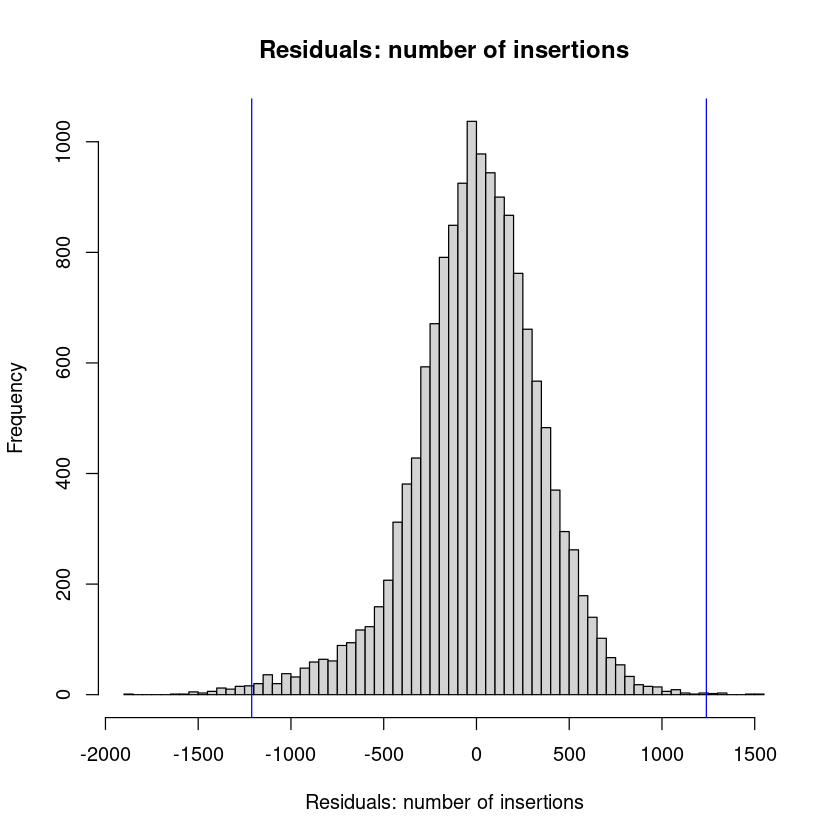

In [65]:
#n insertions
hist(lm_n_ins_residuals, breaks = 50, main = "Residuals: number of insertions", xlab = "Residuals: number of insertions")
upperlim = median(lm_n_ins_residuals) + (4*mad(lm_n_ins_residuals))
lowerlim = median(lm_n_ins_residuals) - (4*mad(lm_n_ins_residuals))
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [66]:
n_ins_outlier_resids = c(qc_df$s[which(lm_n_ins_residuals < lowerlim)], qc_df$s[which(lm_n_ins_residuals > upperlim)])
length(which(startsWith(n_ins_outlier_resids, "E")))
length(which(startsWith(n_ins_outlier_resids, "Z")))
length(n_ins_outlier_resids)

[1] 24

[1] 49

[1] 73

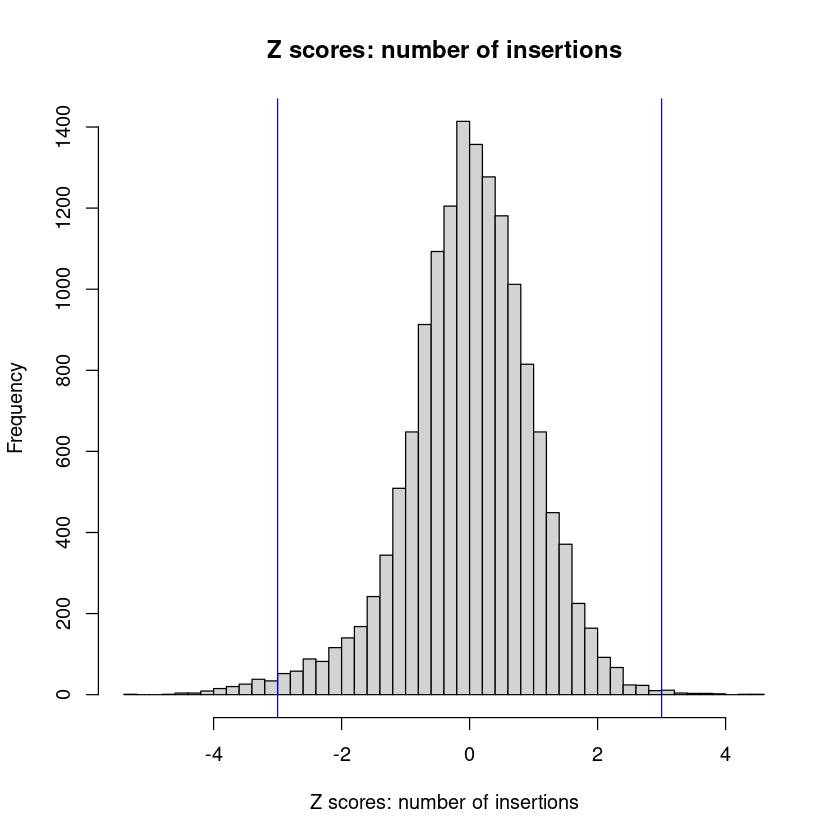

In [67]:
hist(z_df$z_ins, breaks = 50, main = "Z scores: number of insertions", xlab = "Z scores: number of insertions")
upperlim = 3
lowerlim = -3
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [68]:
n_ins_outlier_z = c(qc_df$s[which(z_df$z_ins < lowerlim)], qc_df$s[which(z_df$z_ins > upperlim)])
length(which(startsWith(n_ins_outlier_z, "E")))
length(which(startsWith(n_ins_outlier_z, "Z")))
length(n_ins_outlier_z)

[1] 53

[1] 124

[1] 177

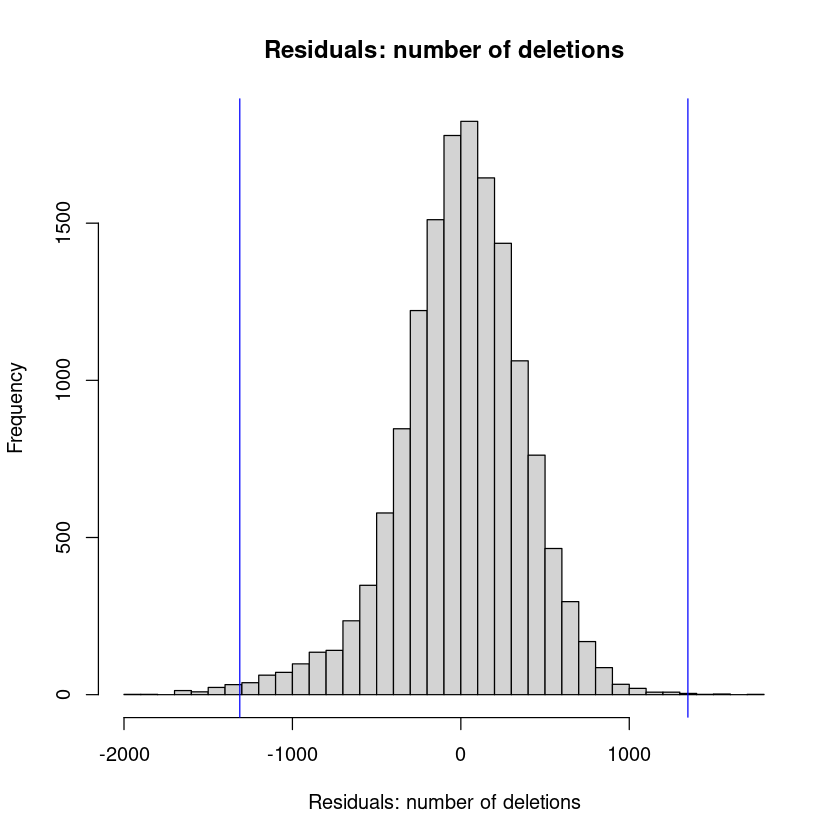

In [69]:
#n deletions
hist(lm_n_del_residuals, breaks = 50, main = "Residuals: number of deletions", xlab = "Residuals: number of deletions")
upperlim = median(lm_n_del_residuals) + (4*mad(lm_n_del_residuals))
lowerlim = median(lm_n_del_residuals) - (4*mad(lm_n_del_residuals))
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [70]:
n_del_outlier_resids = c(qc_df$s[which(lm_n_del_residuals < lowerlim)], qc_df$s[which(lm_n_del_residuals > upperlim)])
length(which(startsWith(n_del_outlier_resids, "E")))
length(which(startsWith(n_del_outlier_resids, "Z")))
length(n_del_outlier_resids)

[1] 28

[1] 52

[1] 80

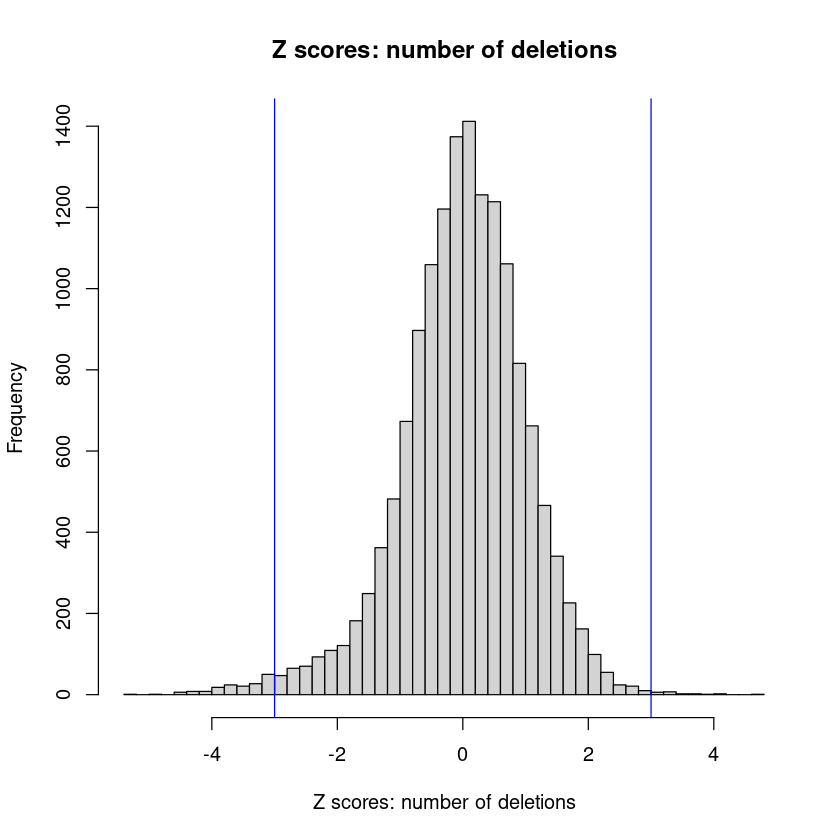

In [71]:
hist(z_df$z_del, breaks = 50, main = "Z scores: number of deletions", xlab = "Z scores: number of deletions")
upperlim = 3
lowerlim = -3
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [72]:
n_del_outlier_z = c(qc_df$s[which(z_df$z_del < lowerlim)], qc_df$s[which(z_df$z_del > upperlim)])
length(which(startsWith(n_del_outlier_z, "E")))
length(which(startsWith(n_del_outlier_z, "Z")))
length(n_del_outlier_z)

[1] 53

[1] 132

[1] 185

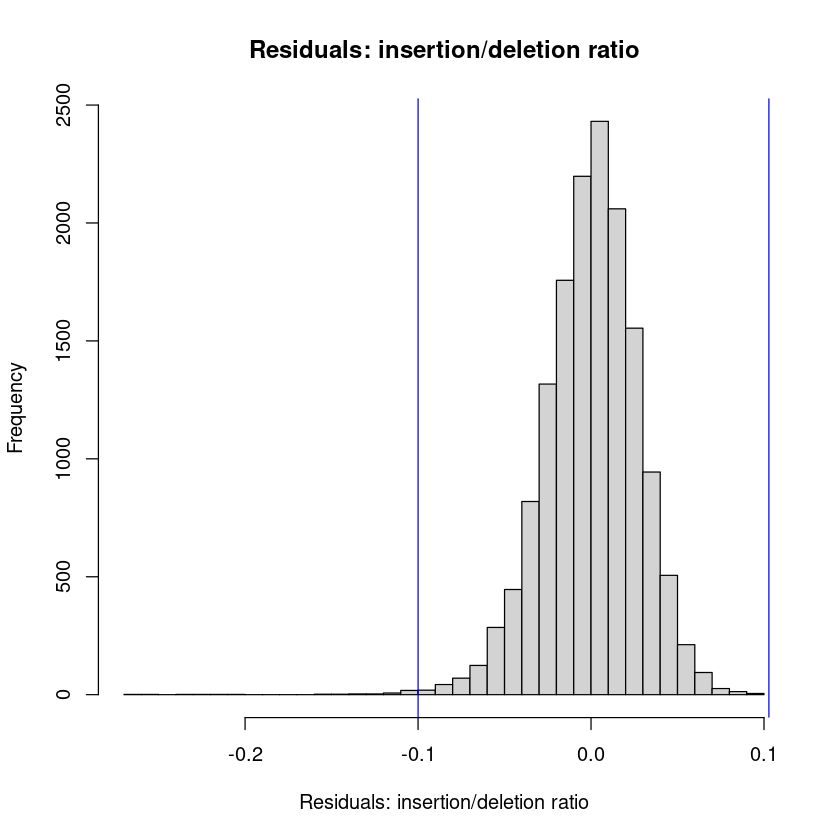

In [73]:
#insertion/deletion ratio
hist(lm_rinsdel_residuals, breaks = 50, main = "Residuals: insertion/deletion ratio", xlab = "Residuals: insertion/deletion ratio")
upperlim = median(lm_rinsdel_residuals) + (4*mad(lm_rinsdel_residuals))
lowerlim = median(lm_rinsdel_residuals) - (4*mad(lm_rinsdel_residuals))
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [74]:
rinsdel_outlier_resids = c(qc_df$s[which(lm_rinsdel_residuals < lowerlim)], qc_df$s[which(lm_rinsdel_residuals > upperlim)])
length(which(startsWith(rinsdel_outlier_resids, "E")))
length(which(startsWith(rinsdel_outlier_resids, "Z")))
length(rinsdel_outlier_resids)

[1] 41

[1] 0

[1] 41

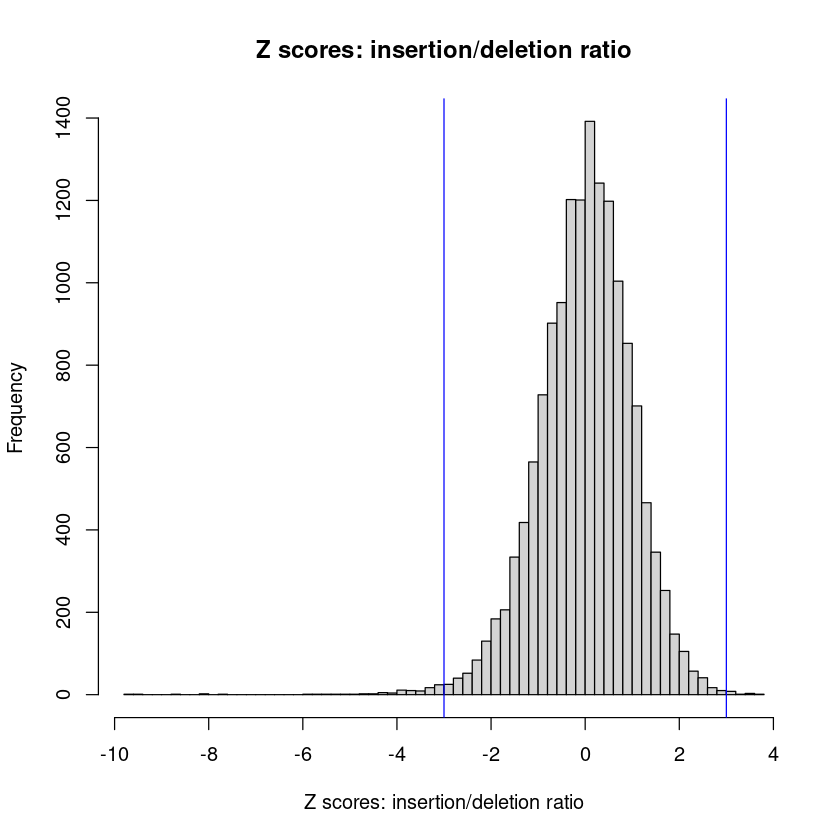

In [75]:
hist(z_df$z_rinsdel, breaks = 50, main = "Z scores: insertion/deletion ratio", xlab = "Z scores: insertion/deletion ratio")
upperlim = 3
lowerlim = -3
abline(v=upperlim, col="blue")
abline(v=lowerlim, col="blue")

In [76]:
rinsdel_outlier_z = c(qc_df$s[which(z_df$z_rinsdel < lowerlim)], qc_df$s[which(z_df$z_rinsdel > upperlim)])
length(which(startsWith(rinsdel_outlier_z, "E")))
length(which(startsWith(rinsdel_outlier_z, "Z")))
length(rinsdel_outlier_z)

[1] 109

[1] 0

[1] 109

In [77]:
#all outliers based on residuals +/4 mad
outliers_resid = unique(c(snp_outlier_resids, n_ti_outlier_resids, n_tv_outlier_resids, rtitv_outlier_resids, het_rate_outlier_resids, rhethom_outlier_resids, n_ins_outlier_resids, n_del_outlier_resids, rinsdel_outlier_resids))
length(which(startsWith(outliers_resid, "E")))
length(which(startsWith(outliers_resid, "Z")))
length(outliers_resid)

[1] 257

[1] 80

[1] 337

In [80]:
#all outliers based on z score +/-3
outliers_z = unique(c(snp_outlier_z, n_ti_outlier_z, n_tv_outlier_z, rtitv_outlier_z, hetr_outlier_z, rhethom_outlier_z, n_ins_outlier_z, n_del_outlier_z, rinsdel_outlier_z))
length(which(startsWith(outliers_z, "E")))
length(which(startsWith(outliers_z, "Z")))
length(outliers_z)

[1] 371

[1] 166

[1] 537

In [81]:
#alternative approach - samples with abs(mean z) > 3
abs_mean_z_outliers = qc_df$s[which(mean_abs_z > 3)]
length(which(startsWith(abs_mean_z_outliers, "E")))
length(which(startsWith(abs_mean_z_outliers, "Z")))
length(abs_mean_z_outliers)

[1] 43

[1] 11

[1] 54